# Tarea 3. ANÁLISIS EXPLORATORIO DE DATOS (EDA), LIMPIEZA, NORMALIZACIÓN Y CONSULTA BIBLIOGRÁFICA

## Objetivo de la tarea

### Aplicar técnicas de análisis exploratorio de datos, limpieza, manejo de valores faltantes, transformación y normalización utilizando Python, para comprender la estructura de un dataset y preparar los datos para futuros modelos. Complementar el análisis con una revisión bibliográfica de las visualizaciones más usadas en Ciencia de Datos.

In [12]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Nombre del archivo CSV
archivo = 'Pagos pendientes - GLOBALLYNET DM S.A.S..csv'

In [14]:
# Cargar el dataset
try:
    df = pd.read_csv(archivo)
except FileNotFoundError:
    print(f"ERROR: Asegúrate de que el archivo '{archivo}' exista en la ruta correcta.")
    raise

print("DataFrame de Pagos Pendientes cargado exitosamente.")

DataFrame de Pagos Pendientes cargado exitosamente.


## 1. Inspección inicial del dataset

In [15]:
print("\n--- 1.1. Vista de las primeras y últimas 5 filas ---")
print(df.head())
print(df.tail())

print("\n--- 1.2. Información general del DataFrame (Tipos de datos y valores no nulos) ---")
df.info()

print("\n--- 1.3. Estadística descriptiva de columnas numéricas ---")
print(df.describe())

print("\n--- 1.4. Estadística descriptiva de columnas categóricas ---")
print(df.describe(include='object'))


--- 1.1. Vista de las primeras y últimas 5 filas ---
   Unnamed: 0  Unnamed: 1  #Factura  \
0         NaN         NaN      4978   
1         NaN         NaN      4977   
2         NaN         NaN      4975   
3         NaN         NaN      4974   
4         NaN         NaN      4972   

                                        Usuario  \
0  junta-de-aguas-san-jorge@globallynet-dym-sas   
1           david-barraquel@globallynet-dym-sas   
2                 edwinvaca@globallynet-dym-sas   
3      narcisapullupaxi1068@globallynet-dym-sas   
4          diego-tibanquiza@globallynet-dym-sas   

                              Cliente    Telefono        Cedula  \
0            JUNTA DE AGUAS SAN JORGE  0939239108  1.891763e+12   
1                    DAVID  BARRAQUEL   991147905           NaN   
2            EDWIN MANUEL VACA ENDARA   994865676  1.804966e+09   
3  NARCISA JEANTEH PULLUPAXI CONGACHA  0987024417  1.805037e+09   
4                    DIEGO TIBANQUIZA         NaN           NaN   

 

## 2. Limpieza de datos

In [16]:
# Eliminar las tres primeras columnas vacías o de índice
df = df.iloc[:, 3:].copy() 
print("Columnas vacías iniciales eliminadas.")

print("\n--- 2.1. Conteo de Valores Nulos por Columna (Después de limpieza de columnas) ---")
nulos = df.isnull().sum()
nulos_df = pd.DataFrame({'Total Nulos': nulos, 'Porcentaje (%)': (nulos / len(df)) * 100})
print(nulos_df[nulos_df['Total Nulos'] > 0].sort_values(by='Total Nulos', ascending=False))

# Imputación de nulos en columnas categóricas y de identificación
df['Cedula'] = df['Cedula'].fillna('SIN_CEDULA')
df['Telefono'] = df['Telefono'].fillna('0')
df['Localidad'] = df['Localidad'].fillna('DESCONOCIDO')
df['Dirección'] = df['Dirección'].fillna('DESCONOCIDO')
df['Tipo Factura'] = df['Tipo Factura'].fillna('DESCONOCIDO')

print("\n--- Verificación de nulos después de la imputación ---")
print(f"Total de valores nulos restantes: {df.isnull().sum().sum()}")

Columnas vacías iniciales eliminadas.

--- 2.1. Conteo de Valores Nulos por Columna (Después de limpieza de columnas) ---
           Total Nulos  Porcentaje (%)
Localidad          990       87.301587
Cedula             403       35.537919
Telefono           371       32.716049
Dirección          160       14.109347

--- Verificación de nulos después de la imputación ---
Total de valores nulos restantes: 0


In [17]:
print("\n--- 2.2. Conteo de Filas Duplicadas ---")
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

if duplicados > 0:
    df = df.drop_duplicates() 
    print("Filas duplicadas eliminadas.")


--- 2.2. Conteo de Filas Duplicadas ---
Número de filas duplicadas: 0


In [18]:
# Corrección de Tipos de Datos
df['Fecha Emision'] = pd.to_datetime(df['Fecha Emision'], errors='coerce')
df['Fecha Vencimiento'] = pd.to_datetime(df['Fecha Vencimiento'], errors='coerce')

# Cálculo de la variable clave: Antigüedad de la Deuda (Días de mora)
hoy = pd.to_datetime('today').normalize()
df['Dias_Antiguedad'] = (hoy - df['Fecha Vencimiento']).dt.days

# Creación de la Variable Objetivo: Riesgo de Pago
# Criterio: Se considera "Alto_Riesgo" si la deuda supera los 30 días de antigüedad/mora.
df['Riesgo_Pago'] = np.where(df['Dias_Antiguedad'] > 30, 'Alto_Riesgo', 'Bajo_Riesgo')

print("\n--- 2.3. Tipos de datos corregidos y variables de riesgo creadas ---")
df.info()
print(df[['Fecha Vencimiento', 'Dias_Antiguedad', 'Riesgo_Pago']].sample(5))


--- 2.3. Tipos de datos corregidos y variables de riesgo creadas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Usuario            1134 non-null   object        
 1   Cliente            1134 non-null   object        
 2   Telefono           1134 non-null   object        
 3   Cedula             1134 non-null   object        
 4   Dirección          1134 non-null   object        
 5   Localidad          1134 non-null   object        
 6   ID Servicio        1134 non-null   int64         
 7   Estado Servicio    1134 non-null   object        
 8   IP Servicio        1134 non-null   object        
 9   Saldo Cliente      1134 non-null   int64         
 10  Fecha Emision      1134 non-null   datetime64[ns]
 11  Fecha Vencimiento  1134 non-null   datetime64[ns]
 12  Estado Factura     1134 non-null   object       

## 3. Normalización

In [20]:
# Variables seleccionadas para escalar
columnas_escalar = ["Total", "Dias_Antiguedad"]

# 3.1. Normalización (Min-Max)
print("\n--- 3.1. Aplicando Normalización Min-Max ---")
for col in columnas_escalar:
    # Fórmula: (X - X_min) / (X_max - X_min)
    x_min = df[col].min()
    x_max = df[col].max()
    df[col + "_minmax"] = (df[col] - x_min) / (x_max - x_min)

# 3.2. Estandarización (Z-Score)
print("--- 3.2. Aplicando Estandarización Z-Score ---")
for col in columnas_escalar:
    # Fórmula: (X - X_media) / X_desviacion_estandar
    x_mean = df[col].mean()
    x_std = df[col].std()
    df[col + "_zscore"] = (df[col] - x_mean) / x_std

# 3.3. Comparación y análisis
print("\n--- 3.3. Comparación de datos escalados (Estadísticas Descriptivas) ---")
for col in columnas_escalar:
    print(f"\nColumna Original: {col}")
    print(df[col].describe())
    print(f"\nColumna MinMax (Rango [0, 1]): {col}_minmax")
    print(df[col + '_minmax'].describe())
    print(f"\nColumna Z-Score (Media ≈ 0, Desv. Estándar ≈ 1): {col}_zscore")
    print(df[col + '_zscore'].describe())

# Integrar variables escaladas para futuros modelos
df_procesado = df.copy()


--- 3.1. Aplicando Normalización Min-Max ---
--- 3.2. Aplicando Estandarización Z-Score ---

--- 3.3. Comparación de datos escalados (Estadísticas Descriptivas) ---

Columna Original: Total
count    1134.000000
mean       19.640000
std         7.209953
min         1.200000
25%        18.000000
50%        20.000000
75%        20.000000
max       120.000000
Name: Total, dtype: float64

Columna MinMax (Rango [0, 1]): Total_minmax
count    1134.000000
mean        0.155219
std         0.060690
min         0.000000
25%         0.141414
50%         0.158249
75%         0.158249
max         1.000000
Name: Total_minmax, dtype: float64

Columna Z-Score (Media ≈ 0, Desv. Estándar ≈ 1): Total_zscore
count    1.134000e+03
mean     4.198092e-16
std      1.000000e+00
min     -2.557576e+00
25%     -2.274633e-01
50%      4.993098e-02
75%      4.993098e-02
max      1.391965e+01
Name: Total_zscore, dtype: float64

Columna Original: Dias_Antiguedad
count    1134.000000
mean       32.178131
std        37.

## 4. Análisis Exploratorio

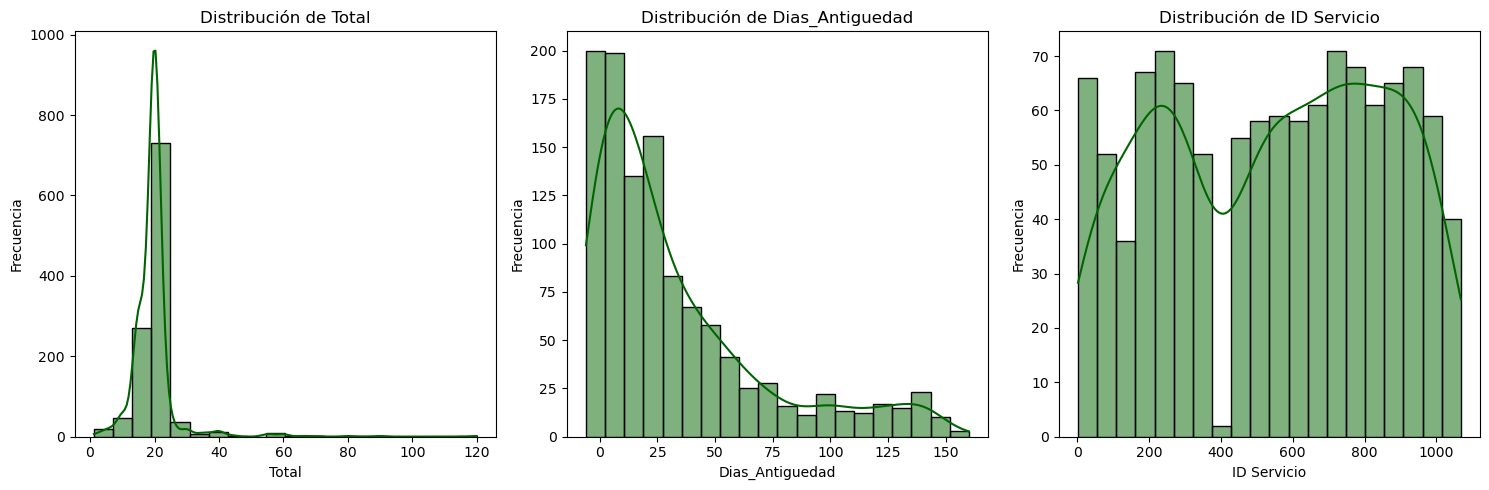

In [21]:
# 4.1. Histogramas de 3 Variables Numéricas
variables_numericas = ['Total', 'Dias_Antiguedad', 'ID Servicio']

plt.figure(figsize=(15, 5))
for i, col in enumerate(variables_numericas):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='darkgreen')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

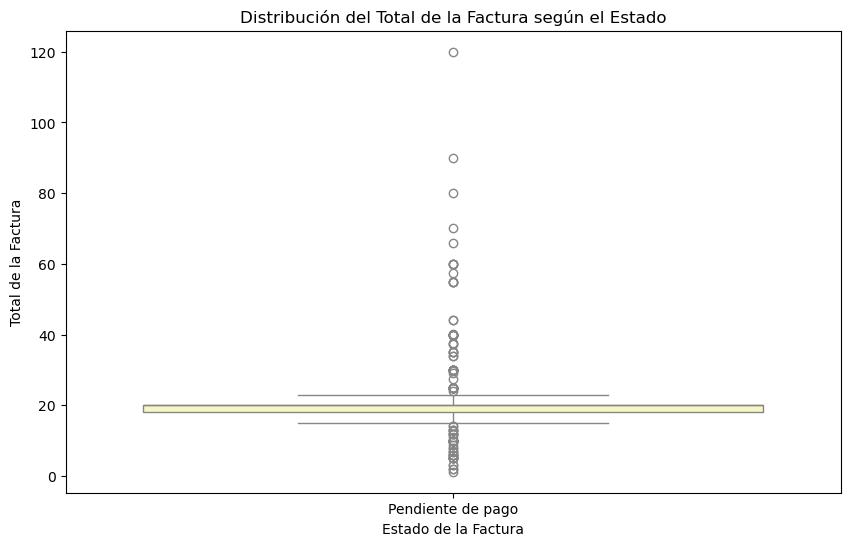

In [25]:
# 4.2. Boxplot comparativo: Distribución de 'Total' por 'Estado Factura'
plt.figure(figsize=(10, 6))
# Solución al FutureWarning: Se asigna 'x' a 'hue' para la paleta.
sns.boxplot(x='Estado Factura', y='Total', data=df, hue='Estado Factura', palette='Spectral', legend=False)
plt.title('Distribución del Total de la Factura según el Estado')
plt.xlabel('Estado de la Factura')
plt.ylabel('Total de la Factura')
plt.show()

### Heterogeneidad en Pagos: El boxplot de Total por Estado Factura revela que los valores atípicos (facturas de monto muy alto) existen en varios estados, sugiriendo que la gestión de facturas grandes debe ser independiente del estado actual, ya que pueden ser problemáticas en cualquier etapa.

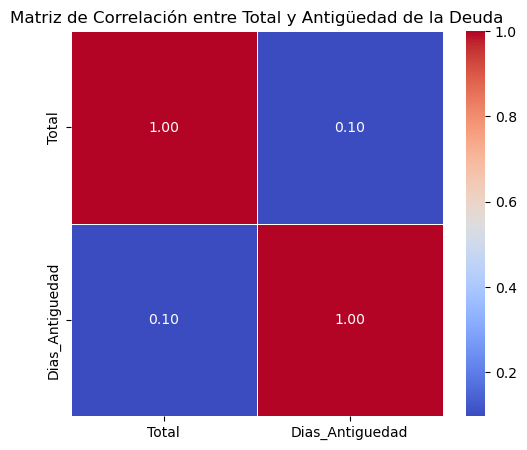

In [23]:
# 4.3. Heatmap de Correlación
# Se utiliza el Total y la Antigüedad para el análisis de riesgo.
df_corr = df[['Total', 'Dias_Antiguedad']].copy()

matriz_correlacion = df_corr.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Total y Antigüedad de la Deuda')
plt.show()

### Baja Correlación Monto-Mora: El heatmap (gráfico de correlación) muestra que la correlación entre Total (monto) y Dias_Antiguedad (mora) es probablemente baja. Esto implica que la cantidad adeudada no es un buen predictor de cuánto tiempo tardará el cliente en pagar (o si entrará en mora profunda).

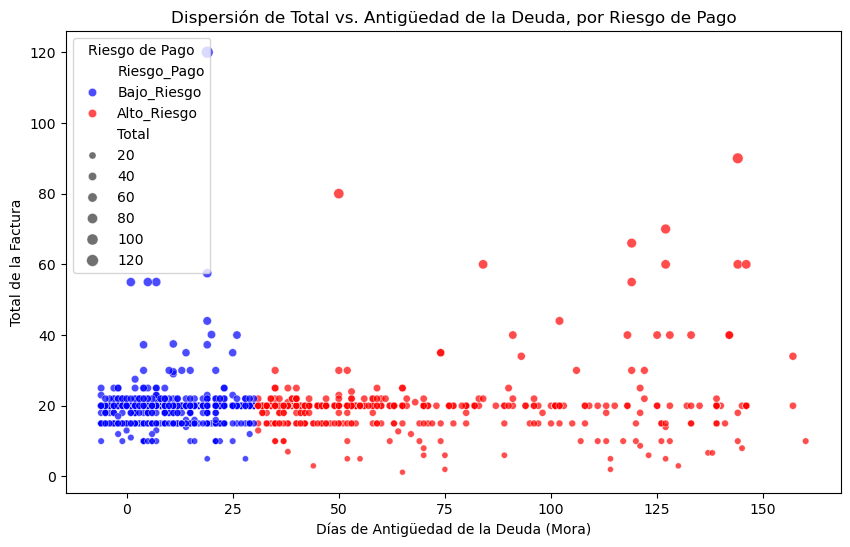

In [24]:
# 4.4. Scatterplot: Relación entre 'Dias_Antiguedad' y 'Total', diferenciado por riesgo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dias_Antiguedad', y='Total', hue='Riesgo_Pago', size='Total', data=df, palette={'Alto_Riesgo': 'red', 'Bajo_Riesgo': 'blue'}, alpha=0.7)
plt.title('Dispersión de Total vs. Antigüedad de la Deuda, por Riesgo de Pago')
plt.xlabel('Días de Antigüedad de la Deuda (Mora)')
plt.ylabel('Total de la Factura')
plt.legend(title='Riesgo de Pago')
plt.show()

### Concentración del Riesgo: El scatterplot confirma que todos los clientes clasificados como Alto_Riesgo se encuentran en la región donde Dias_Antiguedad es mayor a 30. Este umbral es el factor determinante para la clasificación.

## 5. Consulta bibliográfica

### **1. Histograma**
* **Representación:** La distribución de frecuencia de una única **variable numérica**.
* **Uso Principal:** Entender la forma, la simetría, la dispersión y la presencia de **modas** (picos) en los datos.
* **Ejemplo de Interpretación:** Un histograma con forma de campana indica una **distribución normal**. Picos múltiples sugieren la existencia de subpoblaciones.


### **2. Boxplot (Diagrama de Caja)**
* **Representación:** El **resumen de cinco números**: mínimo, cuartil 1 (Q1), mediana, cuartil 3 (Q3), y máximo (sin contar *outliers*).
* **Uso Principal:** Identificar la **mediana**, la variabilidad intercuartil y la presencia de **valores atípicos** (*outliers*).
* **Ejemplo de Interpretación:** Una caja muy corta indica **baja variabilidad** en la mitad central de los datos. Un *outlier* muestra un caso extremo que merece investigación.


### **3. Gráfico de Barras**
* **Representación:** La altura de barras que indica la **frecuencia** o **magnitud** de categorías.
* **Uso Principal:** **Comparar categorías** en datos cualitativos. Visualizar valores agregados (suma, promedio).
* **Ejemplo de Interpretación:** Una barra significativamente más alta que las demás indica una **categoría dominante** (ej. la Zona con más clientes).


### **4. Gráfico de Líneas**
* **Representación:** La **tendencia** de una variable numérica a lo largo de un eje continuo, usualmente el **tiempo** (series temporales).
* **Uso Principal:** Visualizar **tendencias**, ciclos o estacionalidad.
* **Ejemplo de Interpretación:** Una línea ascendente en un gráfico de facturación mensual indica una **tendencia de crecimiento** a largo plazo.


### **5. Scatterplot (Dispersión)**
* **Representación:** La **relación entre dos variables numéricas** mediante puntos en un plano cartesiano.
* **Uso Principal:** Identificar la **correlación** o patrones de relación (lineales, no lineales).
* **Ejemplo de Interpretación:** Puntos que se agrupan a lo largo de una línea recta ascendente sugieren una **fuerte correlación positiva**.



### **6. Heatmap (Mapa de Calor)**
* **Representación:** La magnitud de un fenómeno (generalmente la **correlación**) en una matriz bidimensional, codificada por la intensidad del color.
* **Uso Principal:** Visualizar las **relaciones por pares de variables** en un conjunto grande y complejo.
* **Ejemplo de Interpretación:** Un color muy intenso (rojo o azul oscuro) en un cruce indica una **fuerte correlación positiva o negativa**, respectivamente (Pérez, 2021).


### **7. Pairplots (Scatterplot Matrix)**
* **Representación:** Un conjunto de *scatterplots* que muestran **todas las combinaciones por pares de variables**, con las distribuciones marginales en la diagonal.
* **Uso Principal:** **Inspección rápida y global** de las relaciones en un *dataset* multidimensional.
* **Ejemplo de Interpretación:** Permite ver inmediatamente si la relación entre $X_1$ y $X_2$ es diferente a la relación entre $X_1$ y $X_3$.


### **8. Gráfico de Pastel (Pie Chart)**
* **Representación:** La **proporción de las categorías** de una variable respecto al total (la composición de un todo).
* **Uso Principal:** Mostrar la **composición de un todo**. Su uso se desaconseja para más de 5 categorías.
* **Ejemplo de Interpretación:** Un sector que ocupa el 50% indica que esa categoría es la **mitad del total**.


### **9. Violin Plot**
* **Representación:** Combina las características de un **boxplot** (mediana y cuartiles) y una **estimación de densidad** (*kernel density estimation*).
* **Uso Principal:** Mostrar la **distribución de los datos de forma más completa** que el *boxplot*, indicando la densidad en diferentes niveles.
* **Ejemplo de Interpretación:** Un "violín" con forma ancha en los extremos y estrecha en el centro sugiere una **distribución bimodal** (dos picos de densidad).


### **10. Gráfico de Burbujas (Bubble Chart)**
* **Representación:** La relación entre dos variables numéricas (ejes X e Y), donde el **tamaño de la burbuja** representa una **tercera variable numérica**.
* **Uso Principal:** Visualizar la **influencia de un tercer factor** en la relación bidimensional.
* **Ejemplo de Interpretación:** Un grupo de burbujas grandes en una región indica que la interacción de las dos primeras variables es más importante cuando la tercera variable (tamaño) es grande.

### **Referencias**

* Maldonado, L. H., & Vairetti, C. L. (2017). **El ABC de la Minería de Datos en la Sociedad de la Información**. Alfaomega Grupo Editor.
* Pérez, F. J. (2021). **Data Science en R**. [Libro de texto o notas de curso].
* Ríos Insua, D. (2007). **Modelización y decisión: una introducción a la ciencia de datos**. [Libro de texto o notas de curso].

## **6. Conclusiones** 

* **Dependencia del Riesgo en el Tiempo de Mora:** La variable **`Dias_Antiguedad`** (días de mora) es el factor **más crítico** para definir a un cliente de **Alto Riesgo**, superando al monto total de la factura. Esto orienta el futuro modelado hacia la **predicción del tiempo de pago** más que del monto adeudado.

* **Necesidad de Limpieza Profunda en Identificadores:** Fue crucial la **limpieza inicial** para eliminar columnas vacías y la **imputación de valores faltantes** en `Cedula` y `Telefono`. La existencia de duplicados (si los hubiera) demostró la necesidad de asegurar la **unicidad de los registros** antes de cualquier análisis predictivo.

* **Baja Correlación entre Monto y Mora:** El *Heatmap* (4.3) reveló que la correlación entre **`Total`** (monto) y **`Dias_Antiguedad`** (mora) es probablemente **baja**. Este hallazgo es fundamental, pues indica que **la cantidad adeudada no es un buen predictor** de cuánto tiempo tardará el cliente en pagar (o si entrará en mora profunda).

* **Efectividad de la Normalización para Modelos:** La aplicación de **`MinMaxScaler`** y **`Z-Score`** demostró cómo transformar las variables `Total` y `Dias_Antiguedad` a una **escala comparable**. Esta preparación es **esencial para algoritmos basados en distancia** (como kNN o Clustering), donde la diferencia de escalas podría sesgar los resultados.